In [3]:
from csv import reader
import numpy as np  
import pandas as pd  
from pandas_datareader import data as dt  
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [4]:
# plots short and long sma/ema in various combinations
def MAplotter(tckr, short_term, long_term, nmbr): 
    tckr = str(tckr)
    data = pd.DataFrame()
    data[tckr] = dt.DataReader(tckr, data_source='yahoo', start='2015-1-1')['Close']
    
    short_SMA = data.rolling(window = short_term).mean()
    long_SMA = data.rolling(window = long_term).mean()
    
    short_EMA = data.ewm(span = short_term, adjust=False).mean()
    long_EMA = data.ewm(span = long_term, adjust=False).mean()
    data.plot(label = tckr, figsize = (20, 10))
    
    if nmbr == 1:
        plt.plot(short_SMA, color ='orange')
        plt.plot(long_SMA, color ='red')
        #plt.set_title("SMA")
        plt.legend([tckr, 'Short SMA', 'Long SMA'])
    elif nmbr == 2:
        plt.plot(short_EMA, color ='blue')
        plt.plot(long_EMA, color ='black')
        #plt.set_title("EMA")
        plt.legend([tckr, 'Short EMA', 'Long EMA'])
    elif nmbr == 3:
        plt.plot(short_SMA, color ='orange')
        plt.plot(short_EMA, color ='blue')
        #plt.set_title("Short")
        plt.legend([tckr, 'Short SMA', 'Short EMA'])
    elif nmbr == 4:
        plt.plot(long_SMA, color ='red')
        plt.plot(long_EMA, color ='black')
        #plt.set_title("Long")
        plt.legend([tckr, 'Long SMA', 'Long EMA'])
    else:
        print("Incorrect number")
    

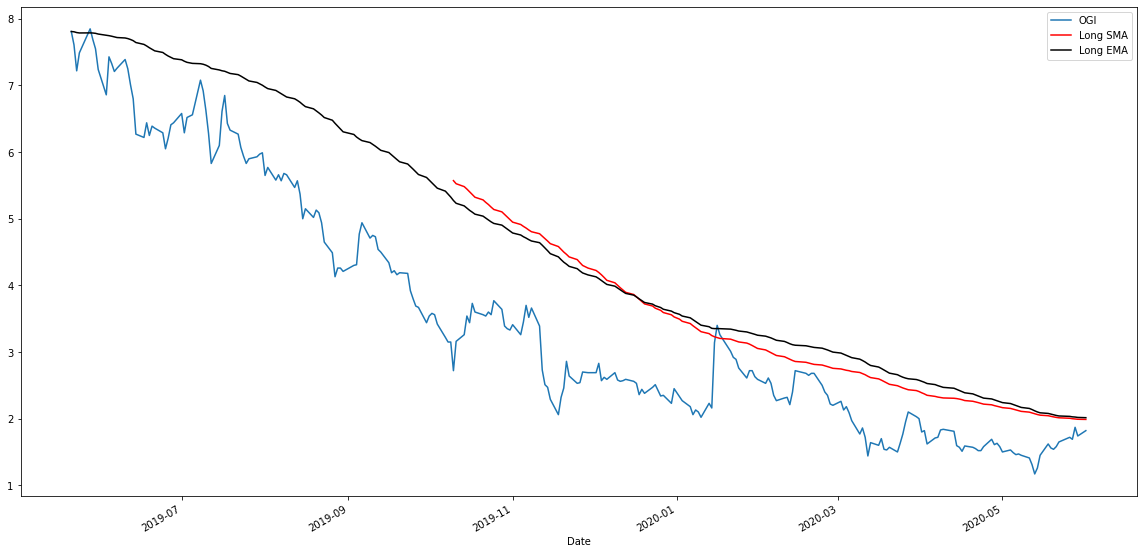

In [10]:
#last argument is which graph is desired:
#all graphs plot stock data on daily close from 2015-
# 1: short and long sma
# 2: short and long ema
# 3: short sma and ema
# 4: long sma and ema
MAplotter('OGI', 20, 100, 4)

In [6]:
#not sure I want to use this yet, uses a lot of memory

open_file = open('Stock Market Data.csv', encoding='utf8')
read_file = reader(open_file)
Stocks = list(read_file)
stock_header = Stocks[0]
stocks = Stocks[1:]

ticker_list = []
for row in stocks:
    ticker_list.append(row[1])